In [2]:
import numpy as np
import pandas as pd 
%matplotlib inline

from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('../datasets/tic-tac-toe.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [4]:
df.shape

(958, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
0    958 non-null object
1    958 non-null object
2    958 non-null object
3    958 non-null object
4    958 non-null object
5    958 non-null object
6    958 non-null object
7    958 non-null object
8    958 non-null object
9    958 non-null object
dtypes: object(10)
memory usage: 75.0+ KB


In [6]:
df.isnull().values.any()

False

In [7]:
df.rename(columns={0: 'top-left-square', 1: 'top-middle-square', 2: 'top-right-square', 3: 'middle-left-square', 4: 'middle-middle-square',
                            5: 'middle-right-square', 6: 'bottom-left-square', 7: 'bottom-middle-square', 8: 'bottom-right-square', 9: 'Class',}, inplace = True)

In [8]:
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [10]:
from sklearn.preprocessing import LabelEncoder

k = df.keys()
for i in k:
    ob = LabelEncoder()
    n = str(i) + '_n'
    df[n] = ob.fit_transform(df[i])
    
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class,top-left-square_n,top-middle-square_n,top-right-square_n,middle-left-square_n,middle-middle-square_n,middle-right-square_n,bottom-left-square_n,bottom-middle-square_n,bottom-right-square_n,Class_n
0,x,x,x,x,o,o,x,o,o,positive,2,2,2,2,1,1,2,1,1,1
1,x,x,x,x,o,o,o,x,o,positive,2,2,2,2,1,1,1,2,1,1
2,x,x,x,x,o,o,o,o,x,positive,2,2,2,2,1,1,1,1,2,1
3,x,x,x,x,o,o,o,b,b,positive,2,2,2,2,1,1,1,0,0,1
4,x,x,x,x,o,o,b,o,b,positive,2,2,2,2,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative,1,2,2,2,1,1,1,2,2,0
954,o,x,o,x,x,o,x,o,x,negative,1,2,1,2,2,1,2,1,2,0
955,o,x,o,x,o,x,x,o,x,negative,1,2,1,2,1,2,2,1,2,0
956,o,x,o,o,x,x,x,o,x,negative,1,2,1,1,2,2,2,1,2,0


In [13]:
x = df.iloc[:,10:-1] #input data
y = df['Class_n'] #target data
x.head()

,top-left-square_n,top-middle-square_n,top-right-square_n,middle-left-square_n,middle-middle-square_n,middle-right-square_n,bottom-left-square_n,bottom-middle-square_n,bottom-right-square_n
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0


In [14]:
x.shape,y.shape

((958, 9), (958,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of y_train=>',y_train.shape)
print('Shape of y_test=>',y_test.shape)

Shape of X_train=> (574, 9)
Shape of X_test=> (384, 9)
Shape of y_train=> (574,)
Shape of y_test=> (384,)


## Decision Tree Classifier

In [24]:
decision_tree = tree.DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train,y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Test Accurary : ",decision_tree.score(X_test,y_test))
print("Train Accurary : ",decision_tree.score(X_train,y_train))

Test Accurary :  0.8984375
Train Accurary :  1.0


In [17]:
y_pred_tree

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,

In [18]:
cm_Dtree = confusion_matrix(y_test,y_pred_tree)
cr_Dtree = classification_report(y_test,y_pred_tree)
print("confusion matrix : \n",cm_Dtree)
print("classification report : \n",cr_Dtree)

confusion matrix : 
 [[102  19]
 [ 34 229]]
classification report : 
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       121
           1       0.92      0.87      0.90       263

    accuracy                           0.86       384
   macro avg       0.84      0.86      0.85       384
weighted avg       0.87      0.86      0.86       384



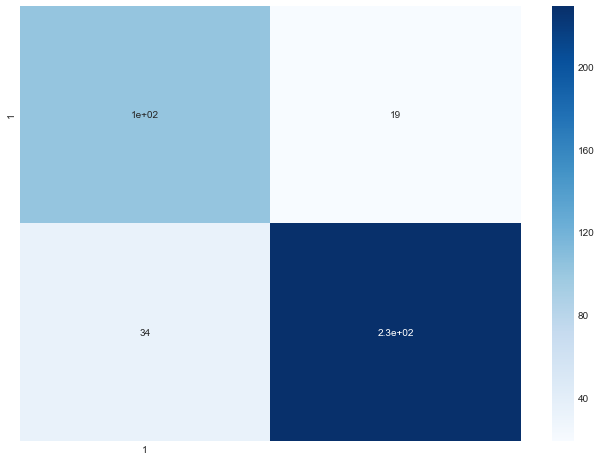

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_Dtree,annot = True,xticklabels = np.arange(1,2),yticklabels = np.arange(1,2),cmap = "Blues")
plt.show()

In [21]:
#Get column names

col_names = list(x.columns)
col_names

['top-left-square_n',
 'top-middle-square_n',
 'top-right-square_n',
 'middle-left-square_n',
 'middle-middle-square_n',
 'middle-right-square_n',
 'bottom-left-square_n',
 'bottom-middle-square_n',
 'bottom-right-square_n']

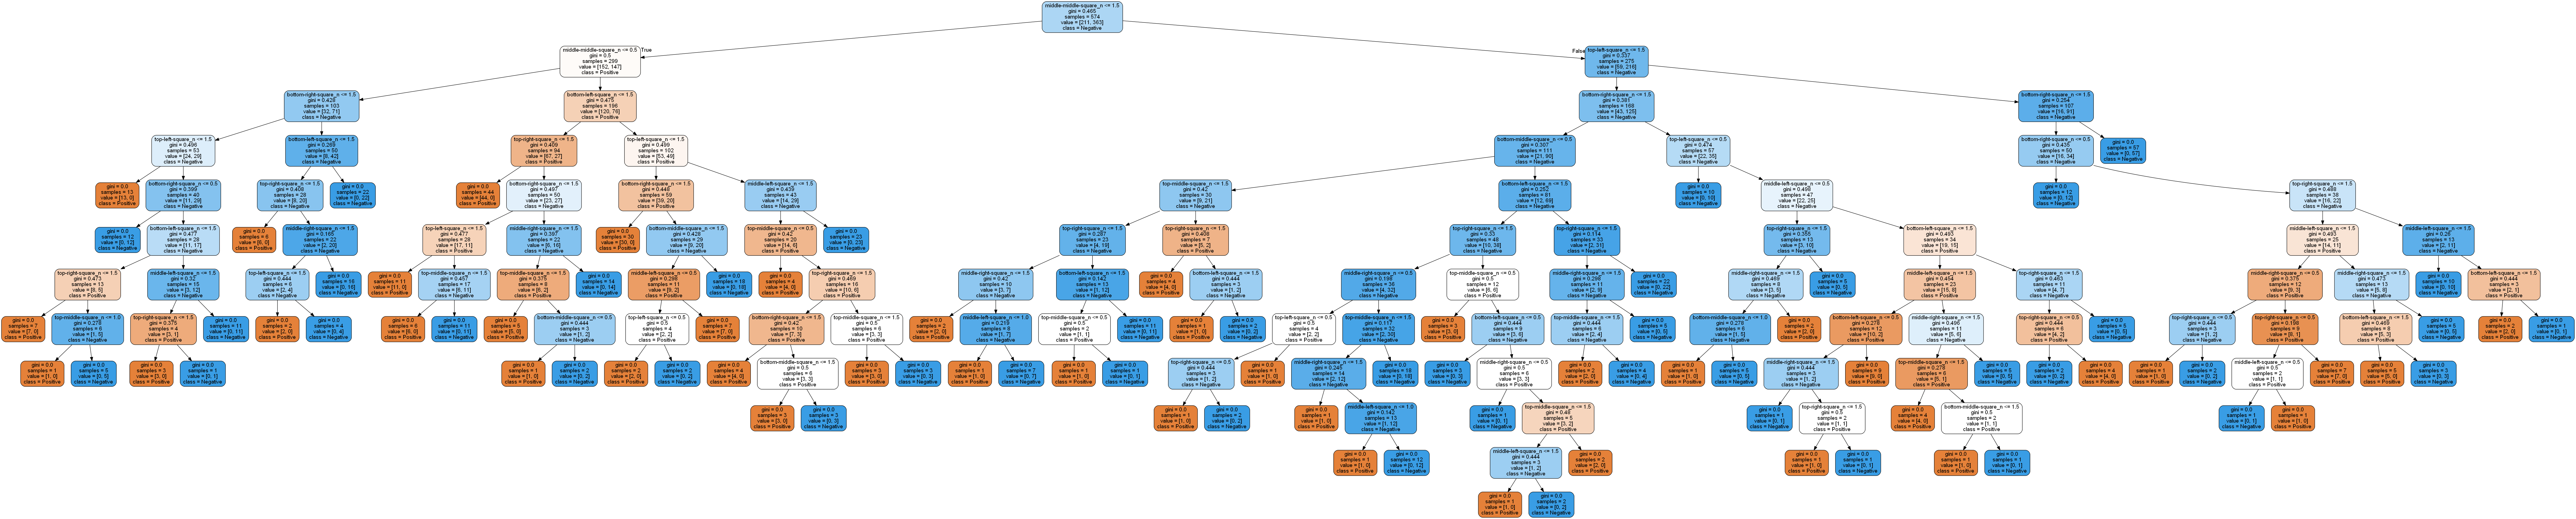

In [22]:
ddata=tree.export_graphviz(decision_tree,out_file=None,filled=True,rounded=True,
                          feature_names=col_names,
                          class_names=["Positive","Negative"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## Random Forest Model

In [23]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
s_max = 0
rf_train_score_list = []
rf_test_score_list = []

for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

Best Score =  0.9479166666666666
Best n_estimators =  338


In [25]:
rf = RandomForestClassifier(n_estimators = 60,random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [26]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cr_rf = classification_report(y_test,y_pred_rf)
print("confusion matrix : \n",cm_rf)
print("classification report : \n",cr_rf)

confusion matrix : 
 [[ 96  25]
 [  1 262]]
classification report : 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88       121
           1       0.91      1.00      0.95       263

    accuracy                           0.93       384
   macro avg       0.95      0.89      0.92       384
weighted avg       0.94      0.93      0.93       384



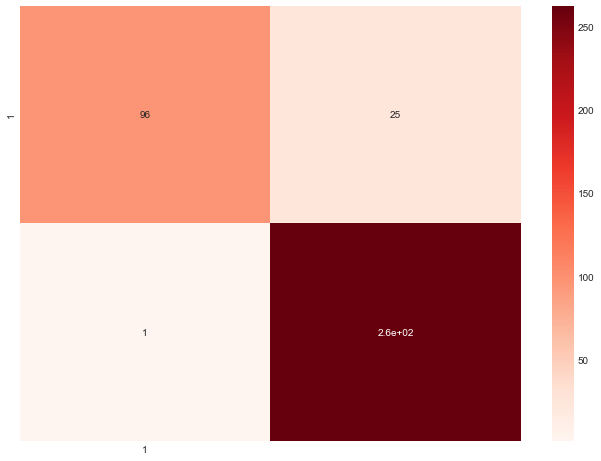

In [27]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_rf,annot = True,xticklabels = np.arange(1,2),yticklabels = np.arange(1,2),cmap = "Reds")
plt.show()

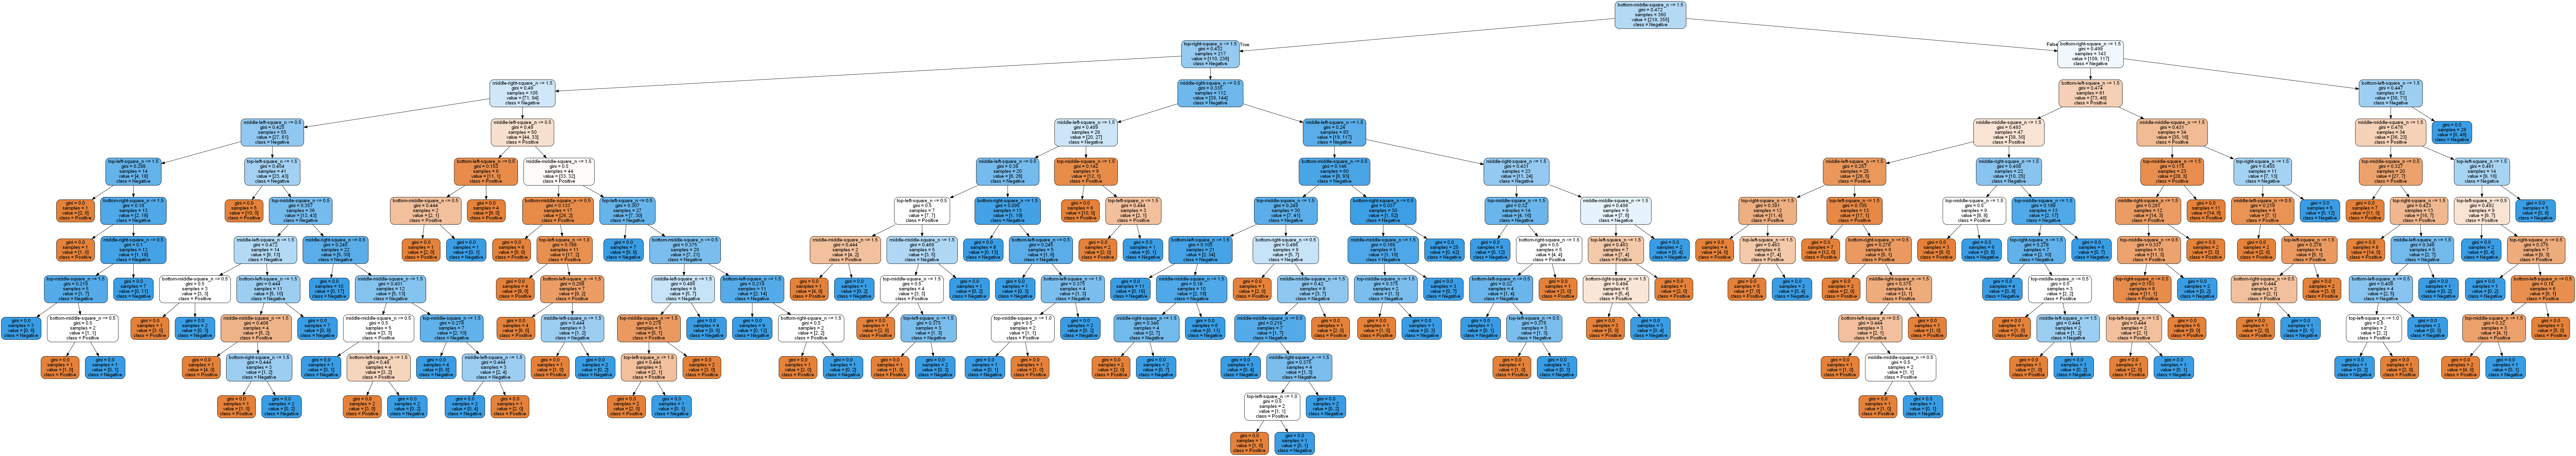

In [28]:
ddata=tree.export_graphviz(rf.estimators_[4],out_file=None,filled=True,rounded=True,
                          feature_names=col_names,
                          class_names=["Positive","Negative"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## SVM Classification

In [29]:
from sklearn.svm import SVC

svm = SVC(random_state = 42,kernel = "linear")
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print("Train Accurary : ",svm.score(X_train,y_train))
print("Test Accuray : ",svm.score(X_test,y_test))

Train Accurary :  0.632404181184669
Test Accuray :  0.6848958333333334


In [30]:
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print("confusion matrix : \n",cm_svm)
print("classification report : \n",cr_svm)

confusion matrix : 
 [[  0 121]
 [  0 263]]
classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.68      1.00      0.81       263

    accuracy                           0.68       384
   macro avg       0.34      0.50      0.41       384
weighted avg       0.47      0.68      0.56       384



C:\Users\Lydia Afiqah\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


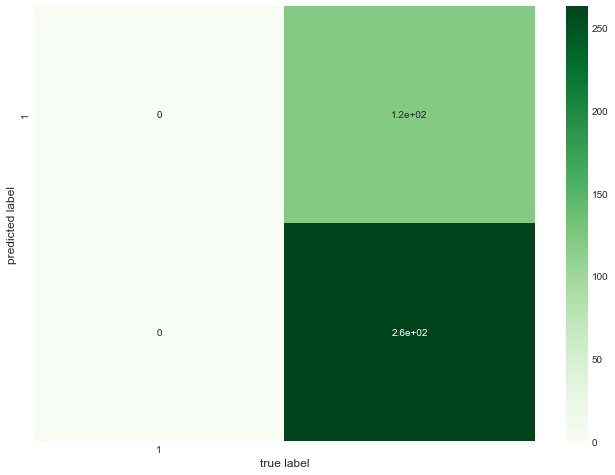

In [33]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Greens",xticklabels = np.arange(1,2),yticklabels = np.arange(1,2))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()